# Análise exploratória

## Carregamento dos dados

Carrega as bibliotecas e os dados da base do Global Biotic Interations e da IUCN.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

redlist_df = pd.read_csv("../../redlist_species_data_83aad1b1-09d6-4283-b629-0ccacb10797b/assessments.csv")
redlist_df

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,...,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,495630,10030,Hexanchus griseus,Near Threatened,A2bd,2020,2019-11-21 00:00:00 UTC,3.1,English,<p>The&#160;Bluntnose Sixgill Shark (<em>Hexan...,...,Decreasing,"The Bluntnose Sixgill Shark has a widespread, ...","<p>The species is utilized for its meat, liver...",Marine,"<p>Since 2010, the European Union Fisheries Co...",NaN,NaN,False,False,Global
1,495907,10041,Heosemys annandalii,Critically Endangered,A2cd+4cd,2021,2018-03-13 00:00:00 UTC,3.1,English,<p><em>Heosemys annandalii</em> is considered ...,...,Decreasing,<p>The range of <em>Heosemys annandalii</em> i...,The species is collected for local consumption...,Terrestrial|Freshwater (=Inland waters),<p><em>Heosemys annandalii </em>is included in...,Indomalayan,NaN,False,False,Global
2,497499,132523146,Hubbsina turneri,Critically Endangered,"B1ab(i,ii,iii,iv)+2ab(i,ii,iii,iv)",2019,2018-04-17 00:00:00 UTC,3.1,English,The Highland Splitfin is now only known to be ...,...,Decreasing,The Highland Splitfin is a freshwater fish spe...,The Highland Splitfin is not a target species ...,Freshwater (=Inland waters),No conservation actions targeting&#160;<em>Hub...,Neotropical,NaN,False,False,Global
3,497550,10267,Hungerfordia pelewensis,Endangered,"B1ab(ii,iii)+2ab(ii,iii)",2012,2011-08-22 00:00:00 UTC,3.1,English,"<p><span lang=""EN-US"">In recent surveys, the s...",...,Unknown,"<p><span lang=""EN-US"">This is a land snail end...",This species is not utilized.,Terrestrial,<p> </p><p> </p><p>Field work to define the ...,Oceanian,NaN,False,False,Global
4,498476,10769,Ictalurus mexicanus,Vulnerable,D2,2019,2018-12-06 00:00:00 UTC,3.1,English,<em>I. mexicanus </em>is herein categorized as...,...,Unknown,<p><em>Ictalurus mexicanus</em> is a species e...,This species is not utilised or traded.,Freshwater (=Inland waters),"<p>In Mexico,&#160;<em>Ictalurus mexicanus</em...",Neotropical,NaN,False,False,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,197564498,64563550,Filicium thouarsianum,Near Threatened,"B2ab(i,ii,iii)",2020,2020-03-28 00:00:00 UTC,3.1,English,<em>Filicium</em> <em>thouarsianum </em>is<em>...,...,Decreasing,<em>Filicium</em> <em>thouarsianum</em>&#160;i...,There is no reported use information for the s...,Terrestrial,"The species occurs in <span class=""ItemText"">A...",Afrotropical,NaN,False,False,Global
50246,197565732,46486,Melanophylla angustior,Endangered,"A3c; B2ab(ii,iii,v)",2020,2020-06-17 00:00:00 UTC,3.1,English,"<em>Melanophylla</em> <em>angustior,</em> smal...",...,Decreasing,<em>Melanophylla</em> <em>angustior</em> endem...,There is no reported use information of this s...,Terrestrial,There are two subpopulations known for the spe...,Afrotropical,NaN,False,False,Global
50247,197569838,46489,Melanophylla madagascariensis,Endangered,B1ab(iii)+2ab(iii),2020,2020-03-26 00:00:00 UTC,3.1,English,<em><em><em><em>Melanophylla</em> <em>madagasc...,...,Decreasing,<em>Melanophylla</em> <em>madagascariensis </e...,There is no reported use information for this ...,Terrestrial,One known subpopulation is recorded within Bet...,Afrotropical,NaN,False,False,Global
50248,197570616,46490,Melanophylla modestei,Endangered,"A3c; B2ab(ii,iii,iv,v)",2020,2020-03-25 00:00:00 UTC,3.1,English,<em>Melanophylla</em> <em>modestei </em>is a t...,...,Decreasing,<em>Melanophylla</em> <em>modestei </em>is end...,There is no reported use information for this ...,Terrestrial,The species is known from Makira and Masoala p...,Afrotropical,NaN,False,False,Global


In [2]:
interactions_df = pd.read_csv('../../clean-interactions.csv')
interactions_df

,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName
0,Andrena milwaukeensis,Animalia,visitsFlowersOf,Zizia aurea,Plantae
1,Andrena mandibularis,Animalia,visitsFlowersOf,Zanthoxylum americanum,Plantae
2,Andrena edwardsi,Animalia,visitsFlowersOf,Wyethia mollis,Plantae
3,Andrena mandibularis,Animalia,visitsFlowersOf,Viburnum dentatum,Plantae
4,Andrena milwaukeensis,Animalia,visitsFlowersOf,Viburnum lentago,Plantae
...,...,...,...,...,...
922800,Calyptra orthograpta,Animalia,eats,Bubalus bubalis,Animalia
922801,Calyptra orthograpta,Animalia,eats,Cervus unicolor,Animalia
922802,Calyptra orthograpta,Animalia,eats,Elephas maximus,Animalia
922803,Calyptra pseudobicolor,Animalia,eats,Homo sapiens,Animalia


## Distribuição da tendência das populações presentes na lista da IUCN

Os dados apresentados pela Red List ainda contém dados como a tendência de crescimento das populações das espécies listadas. Nesse caso, o gráfico abaixo mostra que a população da maior parte das espécies listadas está em queda, com somente uma pequena parcela apresentando algum aspecto de crescimento ou estabilidade.

<AxesSubplot:title={'center':'Distribuição das tendências de crescimento das populações'}, ylabel='populationTrend'>

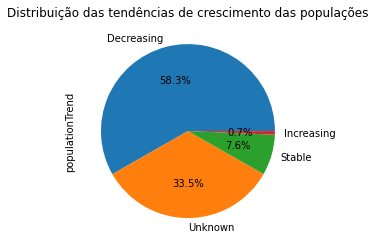

In [3]:
redlist_df.populationTrend.value_counts().plot.pie(title='Distribuição das tendências de crescimento das populações', autopct='%1.1f%%')

## Distribuição das categorias da Red List da IUCN

Além do fato da maior parte das espécies listadas estar em queda, outro fator preocupante é a posição nas categorias da Red List. Como mostra o gráfico abaixo, a maior parte dos animais está em uma situação de vulnerabilidade ou até já em grande perigo.

In [4]:
qtd_reslist_category = redlist_df.redlistCategory.value_counts()
qtd_reslist_category

Vulnerable                           16447
Endangered                           15014
Critically Endangered                 8697
Near Threatened                       8056
Extinct                                942
Lower Risk/near threatened             764
Lower Risk/conservation dependent      189
Extinct in the Wild                     85
Regionally Extinct                      56
Name: redlistCategory, dtype: int64

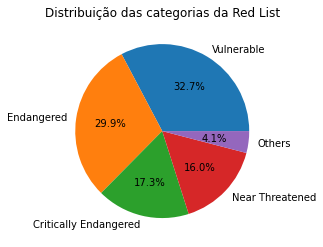

In [43]:
def pie_plot_others(title, series, agg_after):
    others_row = pd.Series({'Others': series[agg_after:].sum()})
    plot_df = pd.concat([series[:agg_after], others_row])
    plot_df.plot.pie(title=title, autopct='%1.1f%%', ylabel='')    

pie_plot_others('Distribuição das categorias da Red List', qtd_reslist_category, 4)

## Distribuição dos Reinos animais que atuam como fonte de interações

As fontes de uma interação são as espécies que efetuam a ação da interação. Um exemplo é a primeira interação da tabela, onde é indicado que a Andrena milwaukeensis, um tipo de abelha, é a fonte de uma interação onde ela visita a Zizia aurea, uma flor.

Em termos de reinos animais, a maior parte das ações das interações são realizadas pelas espécies do reino `Animalia`, seguido por `Fungi` e `Plantae`.

In [51]:
kingdom_source_interactions = interactions_df.sourceTaxonKingdomName.value_counts()
kingdom_source_interactions

Animalia              560209
Fungi                 151215
Plantae                70680
Metazoa                24645
Bacteria               11071
Orthornavirae           9784
Viruses                 7414
Chromista               5383
Protozoa                2867
Shotokuvirae            1866
Viridiplantae           1078
Bamfordvirae             846
Pararnavirae             526
Archaeplastida           386
Protista                 242
Loebvirae                 45
Monera                    39
Chloroplastida            37
Sangervirae               30
Animalia; Animalia        13
Trapavirae                13
Archaea                    8
Helvetiavirae              7
Name: sourceTaxonKingdomName, dtype: int64

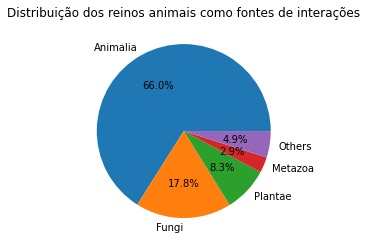

In [52]:
pie_plot_others('Distribuição dos reinos animais como fontes de interações', kingdom_source_interactions, 4)

## Distribuição dos Reinos animais que atuam como alvo de interações

O alvo de uma interação é a espécie que sofre a ação da interação. Assim, com base no exemplo anterior, o alvo seria a planta visitada pela abelha.

Para o caso dos alvos de interações, o reino `Plantae` toma a dianteira, seguido pelo `Animalia` e pelo `Fungi`.

In [49]:
kingdom_target_interactions = interactions_df.targetTaxonKingdomName.value_counts()
kingdom_target_interactions

Plantae           439148
Animalia          326445
Fungi              23256
Metazoa            17424
Viridiplantae      16324
Chromista          14740
Orthornavirae       3164
Protozoa            1509
Archaeplastida      1129
Protista             853
Chloroplastida       741
Shotokuvirae         632
Bacteria             371
Viruses              158
Bamfordvirae          65
Archaea                4
Pararnavirae           3
Name: targetTaxonKingdomName, dtype: int64

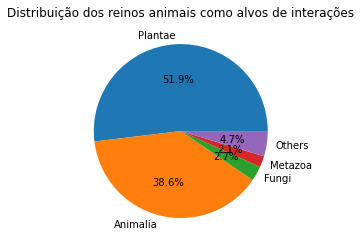

In [53]:
pie_plot_others('Distribuição dos reinos animais como alvos de interações', kingdom_target_interactions, 4)

## Ocorrência de uma espécie como fonte de uma interação

Como é possível ver abaixo, a primeira posição é ocupada de forma disparada pela `Apis mellifera`, a espécie de abelha mais comum do mundo. Ao contrário do que talvez pudesse se imaginar, o ser humano aparece somente na 9º posição desse ranking.

In [5]:
interactions_df.sourceTaxonSpeciesName.value_counts()

Apis mellifera                               2622
Bombus impatiens                              799
Danaus plexippus                              787
Gadus morhua                                  772
Vanessa cardui                                744
                                             ... 
Trichogramma maori                              1
Chardoniella gynoxidis                          1
Myotis Bat Alphacoronavirus strain MJ_51C       1
Gymnomyces xanthosporus                         1
Metasphaeria staritzii                          1
Name: sourceTaxonSpeciesName, Length: 138441, dtype: int64

<AxesSubplot:title={'center':'Quantidade de interações como fonte para cada espécie'}>

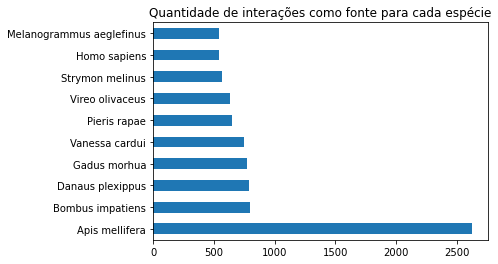

In [6]:
interactions_df.sourceTaxonSpeciesName.value_counts()[:10].plot.barh(title='Quantidade de interações como fonte para cada espécie')

Para entender melhor como as abelhas conseguiram essa primeira posição de forma tão disparada, vamos olhar quais são as interações que têm as abelhas como fonte da ação. Como mostram os dados abaixo, a interação mais realizada pelas abelhas é visitar flores, algo que condiz com o que se esperaria dessa espécie.

In [32]:
bee_interactions = interactions_df.query("sourceTaxonSpeciesName == 'Apis mellifera'").interactionTypeName.value_counts()
bee_interactions

visitsFlowersOf          868
interactsWith            774
eats                     407
pollinates               373
hasHost                   91
mutualistOf               60
visits                    43
preysOn                    3
coOccursWith               2
ecologicallyRelatedTo      1
Name: interactionTypeName, dtype: int64

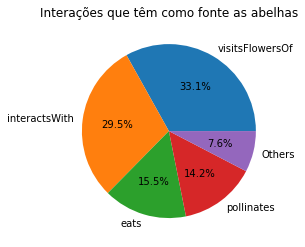

In [45]:
pie_plot_others('Interações que têm como fonte as abelhas', bee_interactions, 4)

## Ocorrência de uma espécie como alvo de uma interação

Como é possível ver abaixo, surpreendentemente, a espécie mais atingida por ações é o ser humano.

In [33]:
interactions_df.targetTaxonSpeciesName.value_counts()

Homo sapiens                 4711
Pinus sylvestris             1940
Bos taurus                   1650
Canis lupus                  1269
Zea mays                     1238
                             ... 
Platycephala umbraculata        1
Agaricus lutosus                1
Echinolittorina angustior       1
Irenina hyptidicola             1
Pezizella alniella              1
Name: targetTaxonSpeciesName, Length: 95324, dtype: int64

<AxesSubplot:title={'center':'Quantidade de interações como alvo para cada espécie'}>

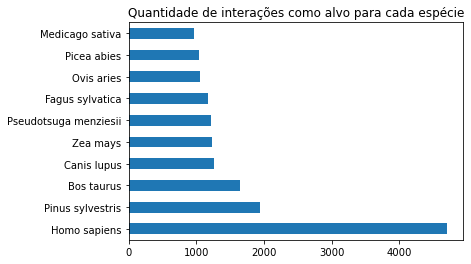

In [34]:
interactions_df.targetTaxonSpeciesName.value_counts()[:10].plot.barh(title='Quantidade de interações como alvo para cada espécie')

Para entender melhor como o ser humano alcançou esse posto de espécie que é o maior alvo de interações, vamos verificar o tipo das interações sofridas pelo ser humano. Como mostra o gráfico abaixo, a parte majoritária dessas interações parecem ser com vírus e outros patógenos.

In [9]:
human_target_interactions = interactions_df.query("targetTaxonSpeciesName == 'Homo sapiens'").interactionTypeName.value_counts()
human_target_interactions

pathogenOf         1924
hasHost            1869
interactsWith       483
parasiteOf          229
eats                134
endoparasiteOf       38
ectoparasiteOf       26
visits                2
preysOn               2
visitsFlowersOf       1
livesOn               1
guestOf               1
livesInsideOf         1
Name: interactionTypeName, dtype: int64

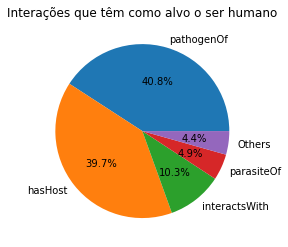

In [46]:
pie_plot_others('Interações que têm como alvo o ser humano', human_target_interactions, 4)

## Espécies que mais se alimentam de outras

Uma das relações mais impactadas pela extinção de um animal é a de alimentação. Dentro desse cenário, com base nos dados de interação, é possível identificar os animais que mais se alimentam de outros. A primeira posição é ocupada pelo `Vireo olivaceus`, um pássaro migratório, seguido de perto pelo `Gadus morhua`, um peixe.

<AxesSubplot:title={'center':'Espécies que mais se alimentam de outras'}>

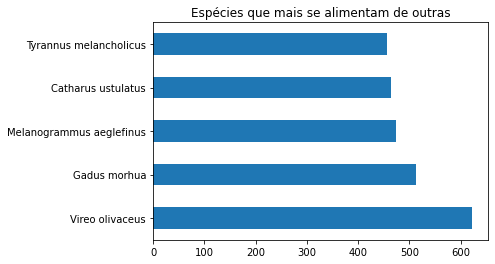

In [15]:
interactions_df.query("interactionTypeName == 'eats'").sourceTaxonSpeciesName.value_counts()[:5].plot.barh(title='Espécies que mais se alimentam de outras')

## Maiores predadores

Se alimentar de um maior número de espécies, porém, não implica que a espécie seja uma grande predadora. Isso fica claro no gráfico abaixo, onde o maior predador encontrado na base foi o `Allagelena gracilens`, uma espécie de aranha encontrada na Europa, seguido de perto pela `Synema Globosum`, outro tipo de aranha.


<AxesSubplot:title={'center':'Maiores predadores'}>

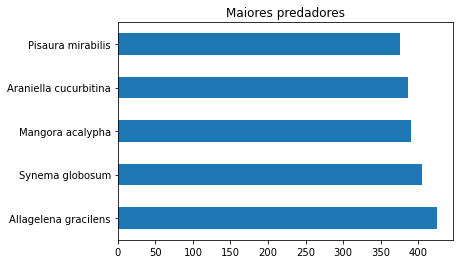

In [16]:
interactions_df.query("interactionTypeName == 'preysOn'").sourceTaxonSpeciesName.value_counts()[:5].plot.barh(title='Maiores predadores')

## Espécies que mais servem de alimento para outras

Já para as espécies que mais servem de alimento, o primeiro lugar vai para o `Pinus sylvestris`, uma espécie de pinho silvestre, seguido pela `Psidium guajava`, uma outra planta. Esse resultado faz sentido, uma vez que as plantas são um tipo de alimento comum para animais. 

<AxesSubplot:title={'center':'Espécies que mais servem de alimento para outras'}>

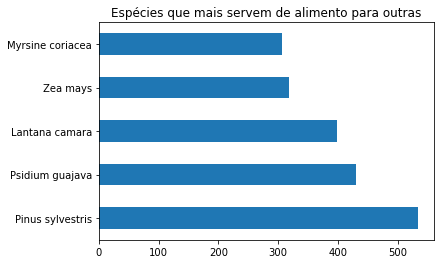

In [35]:
interactions_df.query("interactionTypeName == 'eats'").targetTaxonSpeciesName.value_counts()[:5].plot.barh(title='Espécies que mais servem de alimento para outras')

## Maiores presas

Já com relação às presas, o primeiro lugar fica para a `Temora longicornis`, um tipo de crustáceo, seguido de perto por `Acalypta nigrina` e `Acalypta carinata`, dois insetos. É possível notar que as primeiras posições são ocupadas por pequenos animais, que provavelmente ocupam a base da cadeia alimentar e, portanto, acabam sendo presas fáceis para outras espécies.

<AxesSubplot:title={'center':'Maiores presas'}>

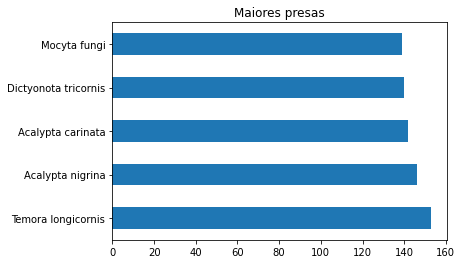

In [36]:
interactions_df.query("interactionTypeName == 'preysOn'").targetTaxonSpeciesName.value_counts()[:5].plot.barh(title='Maiores presas')

## Interações entre as espécies em perigo crítico

Combinando os dados de ambas as bases, é possível observar a relação de espécies em perigo com os demais animais. Nesse caso abaixo, foram observadas as interações que tinham como alvo animais listados como criticamente em perigo. A ideia é ter uma noção de como esses animais, que já estão em alto perigo de extinção, podem impactar em outras espécies.

In [20]:
# Cria um novo dataframe adicionando uma coluna contendo a categoria da redlist para as espécies alvo de cada interação
target_category_df = interactions_df.join(redlist_df.set_index('scientificName')['redlistCategory'], on='targetTaxonSpeciesName')

Com esses dados das interações e da categoria das espécies alvo na lista da IUCN, foi criado o grafo abaixo mostrando a relação das espécies criticamente em perigo com as demais espécies. Nessa figura, é possível perceber que o grafo obtido não é completamente conectado, ou seja, há alguns casos de interações isoladas, onde o impacto parece ser menor. No entanto, vale destacar para estes casos que foram utilizadas somente as interações com espécies criticamente em perigo, então pode ser que haja mais interações para aqueles casos isolados que acabem não sendo exibidas nesse grafo. Por outro lado, é possível perceber também que há espécies que estão ligadas há mais de uma espécie em perigo. Assim, caso uma espécie em perigo seja extinta, ela pode até mesmo acelerar a extinção de uma outra espécie que já está em grande perigo.

/home/lucasnolasco/.local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


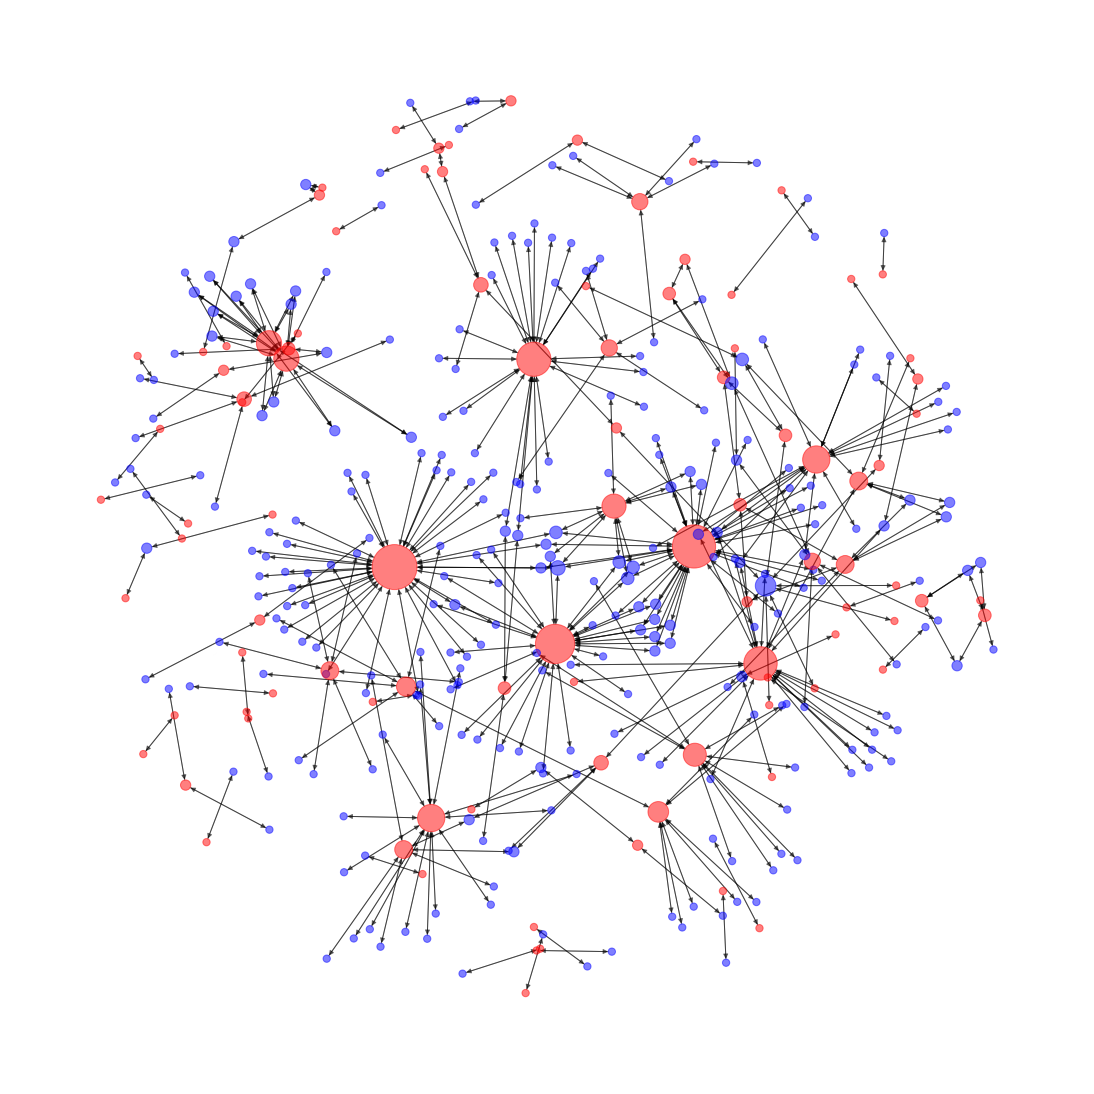

In [21]:
df1 = target_category_df.query("redlistCategory == 'Critically Endangered' and interactionTypeName == 'eats' and sourceTaxonSpeciesName != `targetTaxonSpeciesName`")[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']]

G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

G = nx.DiGraph(G) # Define o grafo como um grafo direcionado

plt.figure(figsize=(15, 15))

degree_centrality=nx.degree_centrality(G) # Calcula o tamanho dos nós com base na quantidade de conexões que cada um tem
nx.set_node_attributes(G, degree_centrality, 'degree_centr')
node_sizes = [v * 10000 for v in degree_centrality.values()]

pos = nx.spring_layout(G, k=0.2) # Calcula as posições onde os nós serão exibidos

# nx.draw_networkx_labels(G, pos, font_size = 9) # Os rótulos não foram desenhados para não atrapalhar a visualização

# Pinta os nós das espécies em perigo de vermelho enquanto mantém os demais em azul
colors = []
critically_endangered_species = redlist_df.query("redlistCategory == 'Critically Endangered'")
for node in G:
    if sum(critically_endangered_species.scientificName.str.contains(node)) > 0:
        colors.append('red')
    else:
        colors.append('blue')

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black') # Exibe o grafo

## Espécies com o maior grau de centralidade no grafo

Para ter uma ideia mais clara da influência de cada uma das espécies, foi calculado o grau de cada um dos nós, o que é baseado na quantidade de conexões que ele apresenta. Assim, os nós encontrados com mais conexões foram a `Castanea dentata`, uma planta de origem americana que produz castanhas, a `Fraxinus americana`, uma árvore também encontrada na América do Norte, e a `Fraxinus Pennsylvanica`. Coincidentemente ou não, as três primeiras espécies em perigo com maior influência nesse grafo gerado são plantas geralmente encontradas na América do Norte, o que pode indicar uma tendência a ser investigada.

In [22]:
degree_df = pd.DataFrame.from_dict(degree_centrality, columns=['Degree'], orient='index')
degree_df.sort_values(by='Degree', ascending=False)

,Degree
Castanea dentata,0.202667
Fraxinus americana,0.186667
Fraxinus pennsylvanica,0.154667
Eleutherodactylus eneidae,0.117333
Anguilla anguilla,0.112000
...,...
Corvus albus,0.005333
Foudia aldabrana,0.005333
Hypsipetes madagascariensis,0.005333
Pteropus aldabrensis,0.005333


<AxesSubplot:title={'center':'Espécies com os maiores graus de centralidade'}>

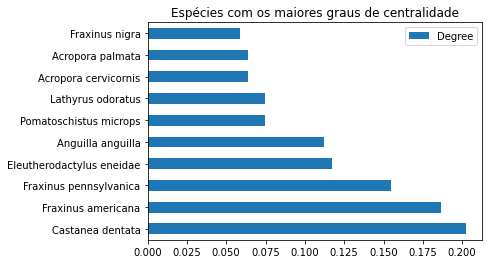

In [23]:
degree_df.sort_values(by='Degree', ascending=False)[:10].plot.barh(title='Espécies com os maiores graus de centralidade')